In [1]:
# Instalar a biblioteca pdfplumber
!pip install pdfplumber


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.2/48.2 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.0/60.0 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 60.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 68.2 MB/s eta 0:00:00


In [7]:
# Importar as bibliotecas necessárias
import pdfplumber
import pandas as pd
import re


In [22]:
from google.colab import files

# Abre janela para você subir o arquivo novamente
uploaded = files.upload()


Saving vendas_abril.pdf to vendas_abril (2).pdf
Saving vendas_fevereiro.pdf to vendas_fevereiro (2).pdf
Saving vendas_janeiro.pdf to vendas_janeiro (2).pdf
Saving vendas_junho.pdf to vendas_junho (2).pdf
Saving vendas_maio.pdf to vendas_maio (2).pdf
Saving vendas_marco.pdf to vendas_marco (2).pdf


In [24]:
# Pegando o nome do arquivo enviado
nome_arquivo = list(uploaded.keys())[0]

import pdfplumber
import pandas as pd
import re

# Abrir o PDF e extrair o texto
texto = ""
with pdfplumber.open(nome_arquivo) as pdf:
    for pagina in pdf.pages:
        texto += pagina.extract_text() + "\n"

# Separar em linhas
linhas = texto.split("\n")

# Lista para guardar os dados encontrados
dados = []

# Expressão regular: pega datas tipo 01/jan e valores tipo 5.238,00
padrao = re.compile(r"(\d{2}/[a-z]{3})\s+([\d.,]+)")

for linha in linhas:
    match = padrao.search(linha)
    if match:
        dia = match.group(1)
        valor = match.group(2)
        dados.append([dia, valor])

# Criar DataFrame
df = pd.DataFrame(dados, columns=["Data", "Total"])
df.head()


,Data,Total
0,01/abr,"1.048,77"
1,02/abr,"1.436,22"
2,03/abr,"945,69"
3,04/abr,"1.676,70"
4,05/abr,"1.176,73"


In [29]:
# Dicionário de tradução de meses
meses_pt_en = {
    'jan': 'jan', 'fev': 'feb', 'mar': 'mar', 'abr': 'apr',
    'mai': 'may', 'jun': 'jun', 'jul': 'jul', 'ago': 'aug',
    'set': 'sep', 'out': 'oct', 'nov': 'nov', 'dez': 'dec'
}

# Função segura que traduz o mês ou retorna None se der erro
def traduzir_mes(data_pt):
    try:
        dia, mes_pt = data_pt.lower().split('/')
        mes_en = meses_pt_en.get(mes_pt, mes_pt)
        return f"{dia}/{mes_en}"
    except:
        return None

# Aplicar a função com proteção
df['Data_en'] = df['Data'].astype(str).apply(traduzir_mes)

# Remover linhas que deram erro (Data_en == None)
df = df[df['Data_en'].notna()]

# Converter para datetime
df['Data'] = pd.to_datetime(df['Data_en'] + '/2025', format='%d/%b/%Y')

# Remover coluna auxiliar
df = df.drop(columns=['Data_en'])

# Ver resultado final
df.head()


,Data,Total


In [30]:
from google.colab import files
import pdfplumber
import pandas as pd
import re

# Fazer upload dos 6 arquivos PDF de uma vez
uploaded = files.upload()

# Dicionário para traduzir meses
meses_pt_en = {
    'jan': 'jan', 'fev': 'feb', 'mar': 'mar', 'abr': 'apr',
    'mai': 'may', 'jun': 'jun', 'jul': 'jul', 'ago': 'aug',
    'set': 'sep', 'out': 'oct', 'nov': 'nov', 'dez': 'dec'
}

# Função segura para traduzir o mês
def traduzir_mes(data_pt):
    try:
        dia, mes_pt = data_pt.lower().split('/')
        mes_en = meses_pt_en.get(mes_pt, mes_pt)
        return f"{dia}/{mes_en}"
    except:
        return None

# Expressão para encontrar datas e valores (ex: 01/jan 5.238,00)
padrao = re.compile(r"(\d{2}/[a-z]{3})\s+([\d.,]+)")

# Lista para juntar todos os dados
lista_dfs = []

# Loop pelos arquivos enviados
for nome_arquivo in uploaded.keys():
    texto = ""
    with pdfplumber.open(nome_arquivo) as pdf:
        for pagina in pdf.pages:
            texto += pagina.extract_text() + "\n"

    # Extrair linhas
    linhas = texto.split("\n")
    dados = []

    for linha in linhas:
        match = padrao.search(linha)
        if match:
            dia = match.group(1)
            valor = match.group(2)
            dados.append([dia, valor])

    # Criar DataFrame temporário
    df_temp = pd.DataFrame(dados, columns=["Data", "Total"])

    # Limpar os valores
    df_temp["Total"] = df_temp["Total"].str.replace(".", "", regex=False)
    df_temp["Total"] = df_temp["Total"].str.replace(",", ".", regex=False).astype(float)

    # Traduzir e converter datas
    df_temp["Data_en"] = df_temp["Data"].astype(str).apply(traduzir_mes)
    df_temp = df_temp[df_temp["Data_en"].notna()]
    df_temp["Data"] = pd.to_datetime(df_temp["Data_en"] + "/2025", format="%d/%b/%Y")
    df_temp = df_temp.drop(columns=["Data_en"])

    # Adicionar à lista
    lista_dfs.append(df_temp)

# Juntar tudo em um único DataFrame
df_final = pd.concat(lista_dfs, ignore_index=True).sort_values("Data").reset_index(drop=True)

# Exibir os primeiros dados
df_final.head()


Saving vendas_abril.pdf to vendas_abril (3).pdf
Saving vendas_fevereiro.pdf to vendas_fevereiro (3).pdf
Saving vendas_janeiro.pdf to vendas_janeiro (3).pdf
Saving vendas_junho.pdf to vendas_junho (3).pdf
Saving vendas_maio.pdf to vendas_maio (3).pdf
Saving vendas_marco.pdf to vendas_marco (3).pdf


,Data,Total
0,2025-01-01,5238.00
1,2025-01-02,0.00
2,2025-01-03,2724.41
3,2025-01-04,2513.65
4,2025-01-05,4182.52


In [31]:
# Instalar o Prophet
!pip install prophet


In [33]:
from prophet import Prophet


In [35]:
# Renomear para o formato do Prophet
df_prophet = df_final.rename(columns={'Data': 'ds', 'Total': 'y'})

# Verificar
df_prophet.head()


,ds,y
0,2025-01-01,5238.00
1,2025-01-02,0.00
2,2025-01-03,2724.41
3,2025-01-04,2513.65
4,2025-01-05,4182.52


In [37]:
# Criar uma coluna que indica se o dia está em julho
df_prophet['julho_alta'] = df_prophet['ds'].dt.month == 7

# Conferir
df_prophet.head()


,ds,y,julho_alta
0,2025-01-01,5238.00,False
1,2025-01-02,0.00,False
2,2025-01-03,2724.41,False
3,2025-01-04,2513.65,False
4,2025-01-05,4182.52,False


In [39]:
from prophet import Prophet

# Criar o modelo com sazonalidade semanal ativada
modelo = Prophet(
    daily_seasonality=True,
    weekly_seasonality=True,
    yearly_seasonality=True
)

# Informar ao modelo que queremos usar a coluna 'julho_alta' como um regressor externo
modelo.add_regressor('julho_alta')

# Treinar o modelo com os dados
modelo.fit(df_prophet)


DEBUG:cmdstanpy:input tempfile: /tmp/tmpayd6sok3/im0fue02.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpayd6sok3/a061hydj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66283', 'data', 'file=/tmp/tmpayd6sok3/im0fue02.json', 'init=/tmp/tmpayd6sok3/a061hydj.json', 'output', 'file=/tmp/tmpayd6sok3/prophet_modeltlhiklgq/prophet_model-20250712224808.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:48:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:48:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [40]:
# Gerar 62 dias futuros (julho + agosto)
futuro = modelo.make_future_dataframe(periods=62)

# Marcar se cada data futura é julho ou não
futuro['julho_alta'] = futuro['ds'].dt.month == 7

# Verificar as próximas datas com marcação
futuro.tail()


,ds,julho_alta
238,2025-08-27,False
239,2025-08-28,False
240,2025-08-29,False
241,2025-08-30,False
242,2025-08-31,False


In [42]:
# Fazer a previsão com o modelo treinado
previsao = modelo.predict(futuro)

# Ver as colunas principais da previsão
previsao[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
238,2025-08-27,-266.591702,-994.295081,473.709468
239,2025-08-28,-530.335001,-1274.733867,182.507232
240,2025-08-29,-236.623623,-992.674333,480.181898
241,2025-08-30,258.075686,-454.963164,997.964637
242,2025-08-31,322.503987,-368.710714,1054.849431


In [44]:
# Filtrar apenas o período de julho e agosto
previsao_jul_ago = previsao[(previsao['ds'] >= '2025-07-01') & (previsao['ds'] <= '2025-08-31')]

# Mostrar as colunas principais
previsao_jul_ago[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()


,ds,yhat,yhat_lower,yhat_upper
181,2025-07-01,1422.588667,650.684522,2200.800132
182,2025-07-02,1472.472777,755.722591,2200.560489
183,2025-07-03,1208.019762,451.385187,1947.262456
184,2025-07-04,1497.013541,786.442423,2206.198045
185,2025-07-05,1982.536041,1269.047993,2719.131198


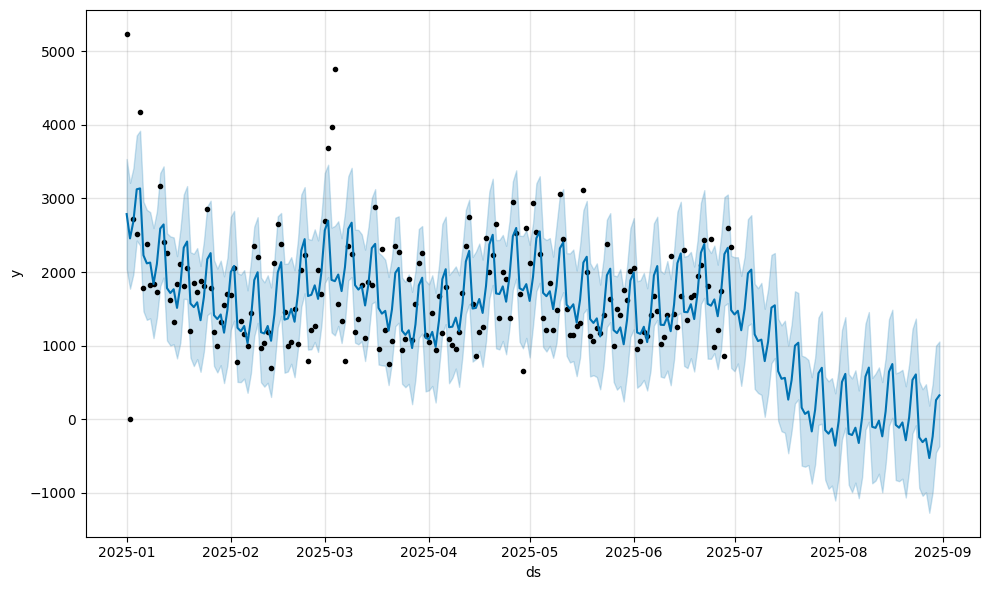

In [45]:
modelo.plot(previsao);


In [46]:
# Filtrar apenas o mês de julho
tabela_julho = previsao[(previsao['ds'] >= '2025-07-01') & (previsao['ds'] <= '2025-07-31')]

# Selecionar e renomear as colunas
tabela_julho_formatada = tabela_julho[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].copy()
tabela_julho_formatada.columns = ['Data', 'Previsão (R$)', 'Mínimo (R$)', 'Máximo (R$)']

# Arredondar os valores
tabela_julho_formatada[['Previsão (R$)', 'Mínimo (R$)', 'Máximo (R$)']] = tabela_julho_formatada[
    ['Previsão (R$)', 'Mínimo (R$)', 'Máximo (R$)']
].round(2)

# Exibir a tabela
tabela_julho_formatada.reset_index(drop=True)


,Data,Previsão (R$),Mínimo (R$),Máximo (R$)
0,2025-07-01,1422.59,650.68,2200.80
1,2025-07-02,1472.47,755.72,2200.56
2,2025-07-03,1208.02,451.39,1947.26
3,2025-07-04,1497.01,786.44,2206.20
4,2025-07-05,1982.54,1269.05,2719.13
5,2025-07-06,2032.93,1300.19,2773.16
6,2025-07-07,1151.84,411.06,1840.08
7,2025-07-08,1060.68,355.04,1779.83
8,2025-07-09,1080.52,329.21,1852.26
9,2025-07-10,788.32,30.35,1499.63


In [48]:
# Corrigir valores negativos na previsão central
tabela_julho_formatada['Previsão (R$)'] = tabela_julho_formatada['Previsão (R$)'].apply(lambda x: max(0, x))

# Corrigir os limites inferior e superior também
tabela_julho_formatada['Mínimo (R$)'] = tabela_julho_formatada['Mínimo (R$)'].apply(lambda x: max(0, x))
tabela_julho_formatada['Máximo (R$)'] = tabela_julho_formatada['Máximo (R$)'].apply(lambda x: max(0, x))

# Ver resultado
tabela_julho_formatada.head()


,Data,Previsão (R$),Mínimo (R$),Máximo (R$)
181,2025-07-01,1422.59,650.68,2200.80
182,2025-07-02,1472.47,755.72,2200.56
183,2025-07-03,1208.02,451.39,1947.26
184,2025-07-04,1497.01,786.44,2206.20
185,2025-07-05,1982.54,1269.05,2719.13


In [52]:
from prophet import Prophet

# ✅ Recriar colunas no df_prophet se necessário
df_prophet['julho_alta'] = df_prophet['ds'].dt.month == 7
df_prophet['fim_de_semana'] = df_prophet['ds'].dt.weekday >= 5  # Sábado (5) e domingo (6)

# ✅ Criar o modelo e adicionar os regressores ANTES do fit
modelo = Prophet(
    daily_seasonality=True,
    weekly_seasonality=True,
    yearly_seasonality=True
)

modelo.add_regressor('julho_alta')
modelo.add_regressor('fim_de_semana')

# ✅ Treinar o modelo com os dados completos
modelo.fit(df_prophet)


DEBUG:cmdstanpy:input tempfile: /tmp/tmpayd6sok3/m76awdmf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpayd6sok3/cf5g493o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63702', 'data', 'file=/tmp/tmpayd6sok3/m76awdmf.json', 'init=/tmp/tmpayd6sok3/cf5g493o.json', 'output', 'file=/tmp/tmpayd6sok3/prophet_modeldsu03l1c/prophet_model-20250713000253.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:02:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:02:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [54]:
# Gerar datas futuras
futuro = modelo.make_future_dataframe(periods=62)

# Marcar as mesmas variáveis nos dados futuros
futuro['julho_alta'] = futuro['ds'].dt.month == 7
futuro['fim_de_semana'] = futuro['ds'].dt.weekday >= 5


In [57]:
previsao = modelo.predict(futuro)
# Gerar a nova previsão usando os dados com regressores
previsao = modelo.predict(futuro)

# Ver as colunas principais
previsao[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
238,2025-08-27,-143.524944,-873.113302,592.544833
239,2025-08-28,-432.509918,-1198.577381,315.642156
240,2025-08-29,-171.967606,-859.762216,552.786194
241,2025-08-30,292.377453,-429.069924,1050.977835
242,2025-08-31,325.493246,-398.695789,1062.842720


In [58]:
# Filtrar apenas os dias de julho
tabela_julho_nova = previsao[(previsao['ds'] >= '2025-07-01') & (previsao['ds'] <= '2025-07-31')]

# Selecionar e renomear colunas
tabela_julho_nova_formatada = tabela_julho_nova[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].copy()
tabela_julho_nova_formatada.columns = ['Data', 'Previsão (R$)', 'Mínimo (R$)', 'Máximo (R$)']

# Corrigir previsões negativas
tabela_julho_nova_formatada[['Previsão (R$)', 'Mínimo (R$)', 'Máximo (R$)']] = tabela_julho_nova_formatada[
    ['Previsão (R$)', 'Mínimo (R$)', 'Máximo (R$)']
].applymap(lambda x: max(0, x)).round(2)

# Exibir a nova tabela
tabela_julho_nova_formatada.reset_index(drop=True)


/tmp/ipython-input-58-4053924212.py:11: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ].applymap(lambda x: max(0, x)).round(2)


,Data,Previsão (R$),Mínimo (R$),Máximo (R$)
0,2025-07-01,1615.16,877.88,2327.41
1,2025-07-02,1688.13,993.74,2421.88
2,2025-07-03,1452.57,668.48,2239.71
3,2025-07-04,1762.02,1050.68,2512.58
4,2025-07-05,2268.89,1497.15,3038.53
5,2025-07-06,2336.39,1572.81,3071.79
6,2025-07-07,1473.29,764.97,2160.30
7,2025-07-08,1402.46,630.76,2187.69
8,2025-07-09,1425.33,742.62,2201.31
9,2025-07-10,1138.52,388.06,1955.92
